In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [46]:
df = pd.read_csv('processed_data.csv')
df.head()

,Sex,Age,Hemoglobin(g/dl),WBC(/L),RBC(/L),Platelets(/L),Neutrophil(%),Lymphocyte(%),Monocyte(%),Eosinophil(%),Basophil(%),HCT/PCV(%),MCV(fL),MCH(pg),MCHC(g/dL),RDW-CV(%),MPV(fL),Dengue_NS1
0,M,18.0,13.6,6.5,5.15,25.0,33.0,57.0,7.0,3.0,0.0,43.4,84.4,26.5,31.3,14.5,10.1,1
1,F,68.0,11.9,7.8,3.95,213.0,84.0,10.0,6.0,0.0,NaN,35.0,89.0,30.0,33.0,NaN,NaN,1
2,M,60.0,10.4,1.0,3.92,20.0,20.0,10.0,0.0,0.0,0.0,32.1,81.9,26.3,32.1,16.2,NaN,1
3,M,25.0,14.7,9.0,5.32,40.0,47.0,45.0,7.0,1.0,0.0,44.6,83.8,27.6,33.0,13.6,12.4,1
4,F,60.0,14.6,3.5,5.90,60.0,70.0,25.0,4.0,1.0,NaN,44.1,73.9,24.5,33.1,14.7,10.7,1


In [47]:
df.isnull().sum()

Sex                  20
Age                  21
Hemoglobin(g/dl)     45
WBC(/L)              41
RBC(/L)              51
Platelets(/L)        29
Neutrophil(%)        51
Lymphocyte(%)        49
Monocyte(%)          51
Eosinophil(%)        51
Basophil(%)          62
HCT/PCV(%)           40
MCV(fL)              54
MCH(pg)              54
MCHC(g/dL)           54
RDW-CV(%)            72
MPV(fL)             127
Dengue_NS1            0
dtype: int64

In [48]:
df.shape

(500, 18)

In [49]:
df.describe()

,Age,Hemoglobin(g/dl),WBC(/L),RBC(/L),Platelets(/L),Neutrophil(%),Lymphocyte(%),Monocyte(%),Eosinophil(%),Basophil(%),HCT/PCV(%),MCV(fL),MCH(pg),MCHC(g/dL),RDW-CV(%),MPV(fL),Dengue_NS1
count,479.000000,455.000000,459.000000,449.000000,471.000000,449.000000,451.000000,449.000000,449.000000,438.000000,460.000000,446.000000,446.000000,446.000000,428.000000,373.000000,500.000000
mean,33.844676,14.651868,6.124102,5.157483,205.121168,51.938753,38.665632,6.446548,2.248775,0.245434,44.414674,86.410448,28.413072,32.787108,13.142710,10.169330,0.496000
std,14.045981,2.245552,2.727862,0.684001,112.784508,15.927623,14.874425,3.060140,2.125421,0.291865,7.516827,9.022623,2.793738,2.479946,1.401175,4.517684,0.500485
min,1.000000,4.600000,1.000000,1.700000,1.800000,6.200000,7.000000,0.000000,0.000000,0.000000,4.850000,32.700000,15.600000,2.870000,5.600000,5.700000,0.000000
25%,24.500000,13.500000,4.135000,4.780000,111.000000,43.400000,29.950000,4.300000,1.000000,0.000000,40.575000,82.000000,27.200000,31.500000,12.300000,9.000000,0.000000
50%,31.000000,14.800000,5.940000,5.170000,221.000000,52.800000,37.800000,6.000000,1.700000,0.200000,45.100000,87.100000,28.985000,32.900000,13.000000,9.900000,0.000000
75%,43.000000,16.200000,7.610000,5.580000,285.500000,61.800000,46.100000,8.000000,3.000000,0.400000,49.025000,91.575000,30.100000,34.200000,13.700000,10.700000,1.000000
max,82.000000,21.400000,25.600000,7.630000,650.000000,89.000000,84.500000,22.300000,19.000000,1.500000,65.300000,118.200000,34.600000,43.000000,23.200000,93.000000,1.000000


In [54]:
print(raw_data_frame['Sex'].value_counts())
raw_data_frame['Sex'].replace(' ', np.NaN, inplace = True)
raw_data_frame['Sex'].value_counts()
raw_data_frame['Sex'] = raw_data_frame['Sex'].replace({'M': 1, 'F':0})

Sex
1.0    332
0.0    147
Name: count, dtype: int64


In [55]:
def missing_imputaion(x,imputer='none'):
    xt=x
    if imputer=='knn':

        X = xt
        imputer = KNNImputer(n_neighbors=2, weights="uniform")
        Knn_data=imputer.fit_transform(X)
        X1=pd.DataFrame(Knn_data)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    elif imputer=='mice':
        Mice_data=MICE().fit_transform(xt)
        X1=pd.DataFrame(Mice_data)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    elif imputer=='randomforest':
        imputer = MissForest()
        Rf = imputer.fit_transform(xt)
        X1=pd.DataFrame(Rf)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    else:
        X1=xt.dropna(axis=0)
        return(X1)

In [58]:
df.isnull().sum()

Sex                  20
Age                  21
Hemoglobin(g/dl)     45
WBC(/L)              41
RBC(/L)              51
Platelets(/L)        29
Neutrophil(%)        51
Lymphocyte(%)        49
Monocyte(%)          51
Eosinophil(%)        51
Basophil(%)          62
HCT/PCV(%)           40
MCV(fL)              54
MCH(pg)              54
MCHC(g/dL)           54
RDW-CV(%)            72
MPV(fL)             127
Dengue_NS1            0
dtype: int64

In [56]:
labels = raw_data_frame['Dengue_NS1']
data_raw = raw_data_frame.drop(['Dengue_NS1'], axis=1)

data_raw = missing_imputaion(x=data_raw, imputer='mice')

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data_raw.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data_raw.columns.values]

C:\Users\Oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Sex                  20
Age                  21
Hemoglobin(g/dl)     45
WBC(/L)              41
RBC(/L)              51
Platelets(/L)        29
Neutrophil(%)        51
Lymphocyte(%)        49
Monocyte(%)          51
Eosinophil(%)        51
Basophil(%)          62
HCT/PCV(%)           40
MCV(fL)              54
MCH(pg)              54
MCHC(g/dL)           54
RDW-CV(%)            72
MPV(fL)             127
Dengue_NS1            0
dtype: int64

In [59]:
categorical_val = []
continous_val = []
for column in df.columns:
    # print('==============================')
    # print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [61]:
print("Categorical features:")
print(categorical_val)
print('Continuous features:')
print(continous_val)

Categorical features:
['Sex', 'Dengue_NS1']
Continuous features:
['Age', 'Hemoglobin(g/dl)', 'WBC(/L)', 'RBC(/L)', 'Platelets(/L)', 'Neutrophil(%)', 'Lymphocyte(%)', 'Monocyte(%)', 'Eosinophil(%)', 'Basophil(%)', 'HCT/PCV(%)', 'MCV(fL)', 'MCH(pg)', 'MCHC(g/dL)', 'RDW-CV(%)', 'MPV(fL)']


In [63]:
feature_columns = df.columns.to_list()

In [64]:
print("Number of qualitative features: " +str(len(categorical_val) ) + " (" + str(len(categorical_val)/40 *100) + "%)" )
print("Number of quantative features: " +str(len(continous_val) ) + " (" + str(len(continous_val)/40 *100) + "%)") 

Number of qualitative features: 2 (5.0%)
Number of quantative features: 16 (40.0%)


for feature in categorical_val:
    vals = sorted(df[feature].unique())
    print(feature, ":", vals)

In [68]:
for feature in categorical_val:
    # Convert numerical values to strings before sorting
    vals = sorted([str(val) for val in df[feature].unique()])
    print(feature, ":", vals)


Sex : [' ', 'F', 'M', 'nan']
Dengue_NS1 : ['0', '1']


In [69]:
df1 = df.dropna()

In [70]:
print(df1.isnull().sum())

Sex                 0
Age                 0
Hemoglobin(g/dl)    0
WBC(/L)             0
RBC(/L)             0
Platelets(/L)       0
Neutrophil(%)       0
Lymphocyte(%)       0
Monocyte(%)         0
Eosinophil(%)       0
Basophil(%)         0
HCT/PCV(%)          0
MCV(fL)             0
MCH(pg)             0
MCHC(g/dL)          0
RDW-CV(%)           0
MPV(fL)             0
Dengue_NS1          0
dtype: int64


In [71]:
df1.shape

(355, 18)

In [73]:
idx = df1['Dengue_NS1'].notnull() 

In [74]:
print(f'Dataset size: {df1.shape}')
print(f'Non-null rows: {idx.notnull().sum()}')

Dataset size: (355, 18)
Non-null rows: 355


In [75]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df1.loc[df1[column] == 0])}")

Sex ==> Missing zeros : 0
Age ==> Missing zeros : 0
Hemoglobin(g/dl) ==> Missing zeros : 0
WBC(/L) ==> Missing zeros : 0
RBC(/L) ==> Missing zeros : 0
Platelets(/L) ==> Missing zeros : 0
Neutrophil(%) ==> Missing zeros : 0
Lymphocyte(%) ==> Missing zeros : 0
Monocyte(%) ==> Missing zeros : 0
Eosinophil(%) ==> Missing zeros : 14
Basophil(%) ==> Missing zeros : 100
HCT/PCV(%) ==> Missing zeros : 0
MCV(fL) ==> Missing zeros : 0
MCH(pg) ==> Missing zeros : 0
MCHC(g/dL) ==> Missing zeros : 0
RDW-CV(%) ==> Missing zeros : 0
MPV(fL) ==> Missing zeros : 0
Dengue_NS1 ==> Missing zeros : 251


In [76]:
df1['Dengue_NS1']

0      1
3      1
6      1
9      1
10     1
      ..
495    0
496    0
497    0
498    0
499    0
Name: Dengue_NS1, Length: 355, dtype: int64

In [77]:
def remove_outliers(dataset, numeric_columns, num_std=3):
   for column in numeric_columns: 
      mean = dataset[column].mean()
      sd = dataset[column].std() 
      dataset = dataset[(dataset[column] <= mean + (num_std * sd))]
      dataset = dataset[(dataset[column] >= mean - (num_std * sd))]
   return dataset

In [79]:
df1.columns

Index(['Sex', 'Age', 'Hemoglobin(g/dl)', 'WBC(/L)', 'RBC(/L)', 'Platelets(/L)',
       'Neutrophil(%)', 'Lymphocyte(%)', 'Monocyte(%)', 'Eosinophil(%)',
       'Basophil(%)', 'HCT/PCV(%)', 'MCV(fL)', 'MCH(pg)', 'MCHC(g/dL)',
       'RDW-CV(%)', 'MPV(fL)', 'Dengue_NS1'],
      dtype='object')

In [78]:
df1.head()

,Sex,Age,Hemoglobin(g/dl),WBC(/L),RBC(/L),Platelets(/L),Neutrophil(%),Lymphocyte(%),Monocyte(%),Eosinophil(%),Basophil(%),HCT/PCV(%),MCV(fL),MCH(pg),MCHC(g/dL),RDW-CV(%),MPV(fL),Dengue_NS1
0,M,18.0,13.6,6.5,5.15,25.0,33.0,57.0,7.0,3.0,0.0,43.4,84.4,26.5,31.3,14.5,10.1,1
3,M,25.0,14.7,9.0,5.32,40.0,47.0,45.0,7.0,1.0,0.0,44.6,83.8,27.6,33.0,13.6,12.4,1
6,F,32.0,13.0,4.5,4.62,221.0,53.0,37.0,3.0,7.0,0.0,39.9,86.4,28.1,32.6,12.0,10.9,1
9,F,1.0,8.6,21.0,4.28,309.0,53.0,37.0,9.0,1.0,0.0,25.1,58.6,20.0,34.3,16.9,5.7,1
10,M,11.0,13.6,4.2,4.90,170.0,54.0,36.0,2.0,8.0,0.0,37.8,77.1,27.8,36.0,13.2,10.6,1


In [ ]:
Dengue cases in diffrent

In [83]:
sub_df = df1[['Sex','Dengue_NS1']]
all_cases={}

for index, row in df1.iterrows():
    if ( row['Dengue_NS1']== 1 or row['Dengue_NS1']== 2 or row['Dengue_NS1']== 3):
        if row['Sex'] not in all_cases.keys():
            all_cases.update({row['Sex']:1})
            
        else:
            all_cases[row['Sex']] = all_cases[row['Sex']]+1

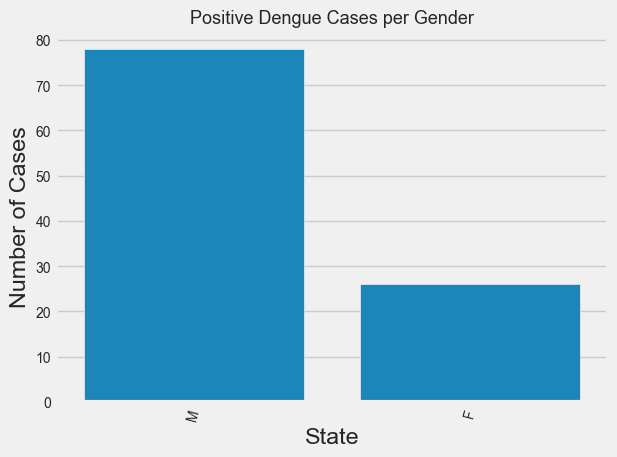

In [86]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# plt.figure(figsize=(12,6))
plt.xticks(rotation=75, fontsize=10)
plt.yticks( fontsize=10)
plt.title('Positive Dengue Cases per Gender', fontsize=13)

# Convert the dictionary to a Pandas DataFrame
df_1 = pd.DataFrame.from_dict(all_cases, orient='index', columns=['Number of Cases'])

# Reset the index to convert the index column into a regular column
df_1 = df_1.reset_index()

# Rename the columns
df_1 = df_1.rename(columns={'index': 'State'})

# Create the barplot using Seaborn's barplot() function
sns.barplot(x='State', y='Number of Cases', data=df_1)
plt.style.use("fivethirtyeight")


plt.savefig("state_data.png", dpi=300, format='png')

In [90]:
df1.columns

Index(['Sex', 'Age', 'Hemoglobin(g/dl)', 'WBC(/L)', 'RBC(/L)', 'Platelets(/L)',
       'Neutrophil(%)', 'Lymphocyte(%)', 'Monocyte(%)', 'Eosinophil(%)',
       'Basophil(%)', 'HCT/PCV(%)', 'MCV(fL)', 'MCH(pg)', 'MCHC(g/dL)',
       'RDW-CV(%)', 'MPV(fL)', 'Dengue_NS1'],
      dtype='object')

In [89]:
subset_4 = df1[['Smoking', 'Dengue_Final_Classification', 'Cardiovascular', 'Hypertension', 'Asthma', 'Diabetes', 'Obesity', 'Pneumonia', 'Chronic_Kidney_Disease', 'COPD', 'Immunosuppression']]

#subset_4.columns = ['Smoking', 'Dengue_Final_Classification', 'Cardiovascular', 'Hypertension', 'Asthma', 'Diabetes', 'Obesity', 'Pneumonia', 'Chronic_Kidney_Disease', 'COPD', 'Immunosuppression']

subset_4.shape


KeyError: "None of [Index(['Smoking', 'Dengue_Final_Classification', 'Cardiovascular',\n       'Hypertension', 'Asthma', 'Diabetes', 'Obesity', 'Pneumonia',\n       'Chronic_Kidney_Disease', 'COPD', 'Immunosuppression'],\n      dtype='object')] are in the [columns]"